In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Notebook ready 🧬")

Notebook ready 🧬


In [2]:
metadata = pd.read_csv("Metadata.tsv", sep="\t")
metadata.head()

,sampleid,Fragment,ParasiteSpecies,ParasiteSex,BatSpecies,BatSex,Index1,Index2,Pool,DateExtracted,DateAmplified,AvLibraryConc,BatID,BatFamily,FeedingGuild,ParasiteFamily,Region
0,#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical
1,1006,REGUA2,Paratrichobius longicrus,M,Artibeus lituratus,M,CGTACTAG,TTATGCGA,HC,41017,51217,0.97,1006,Phyllostomidae,Frugivore,Streblidae,REGArea
2,1012,REGUA2,Strebla guajiro,F,Carollia perspicillata,M,GTAGAGGA,TCGACTAG,HC,121017,51217,1.41,1012,Phyllostomidae,Frugivore,Streblidae,REGArea
3,1015,REGUA2,Paratrichobius longicrus,F,Artibeus lituratus,F,AGGCAGAA,TCGACTAG,HC,41017,51217,1.71,1015,Phyllostomidae,Frugivore,Streblidae,REGArea
4,1017,REGUA2,Trichobius furmani,M,Desmodus rotundus,M,CCTAAGAC,TATCCTCT,HC,21217,61217,0.77,1017,Phyllostomidae,Sanguivore,Streblidae,REGArea


In [3]:
metadata.shape

(229, 17)

In [4]:
metadata_clean = metadata[metadata["sampleid"] != "#q2:types"].copy()
metadata_clean.shape

(228, 17)

In [5]:
asv = pd.read_csv(
    "QIIME2exports/exported-feature-table/feature-table.txt",
    sep="\t",
    comment="#",
    index_col=0
)
asv.shape

(1202, 222)

In [6]:
set(metadata_clean["sampleid"]) & set(asv.columns)

{'1006',
 '1012',
 '1015',
 '1017',
 '102',
 '1022',
 '1033-1',
 '1033-2',
 '1033-3',
 '104-1',
 '105-1',
 '105-2',
 '105-3',
 '1068',
 '1074',
 '1079',
 '1080-2',
 '1086',
 '1089-1',
 '1089-2',
 '1091-1',
 '1091-2',
 '1111-1',
 '1111-2',
 '1111-5',
 '1111-6',
 '1111-7',
 '1114',
 '1116-2',
 '1127',
 '1141-1',
 '1141-2',
 '1155-1',
 '1155-2',
 '1155-4',
 '1155-5',
 '1155-6',
 '126-1',
 '126-2',
 '126-4',
 '128-2',
 '129',
 '133',
 '137-1',
 '137-2',
 '137-3',
 '143-1',
 '143-2',
 '144',
 '147-1',
 '147-2',
 '147-3',
 '163-1',
 '163-2',
 '163-3',
 '165-1',
 '165-5',
 '165-6',
 '168-1',
 '168-2',
 '190-1',
 '190-2',
 '190-3',
 '226-1',
 '226-3',
 '235-1',
 '235-2',
 '235-3',
 '236-1',
 '236-2',
 '238-1',
 '305-1',
 '308-1',
 '308-2',
 '309-2',
 '312-1',
 '312-2',
 '312-3',
 '314',
 '315-1',
 '315-2',
 '317-1',
 '317-2',
 '335-1',
 '336-1',
 '336-2',
 '338',
 '340-2',
 '340-3',
 '349-1',
 '352-2',
 '359-1',
 '359-2',
 '359-3',
 '360-1',
 '362',
 '373-1',
 '373-3',
 '377',
 '38801',
 '389-

In [7]:
shared_samples = list(
    set(metadata_clean["sampleid"]) & set(asv.columns)
)

len(shared_samples)

222

In [9]:
asv_final = asv[shared_samples]

asv_final.shape

(1202, 222)

In [9]:
metadata = pd.read_csv("Metadata.tsv", sep="\t")
metadata = metadata[metadata["sampleid"] != "#q2:types"]

asv = pd.read_csv(
    "QIIME2exports/exported-feature-table/feature-table.txt",
    sep="\t",
    comment="#",
    index_col=0
)

# Keep only shared samples
shared = list(set(metadata["sampleid"]) & set(asv.columns))
metadata = metadata[metadata["sampleid"].isin(shared)].set_index("sampleid")
asv = asv[shared]

In [10]:
metadata.shape, asv.shape

((222, 16), (1202, 222))

In [11]:
metadata.head()

,Fragment,ParasiteSpecies,ParasiteSex,BatSpecies,BatSex,Index1,Index2,Pool,DateExtracted,DateAmplified,AvLibraryConc,BatID,BatFamily,FeedingGuild,ParasiteFamily,Region
sampleid,,,,,,,,,,,,,,,,
1006,REGUA2,Paratrichobius longicrus,M,Artibeus lituratus,M,CGTACTAG,TTATGCGA,HC,41017,51217,0.97,1006,Phyllostomidae,Frugivore,Streblidae,REGArea
1012,REGUA2,Strebla guajiro,F,Carollia perspicillata,M,GTAGAGGA,TCGACTAG,HC,121017,51217,1.41,1012,Phyllostomidae,Frugivore,Streblidae,REGArea
1015,REGUA2,Paratrichobius longicrus,F,Artibeus lituratus,F,AGGCAGAA,TCGACTAG,HC,41017,51217,1.71,1015,Phyllostomidae,Frugivore,Streblidae,REGArea
1017,REGUA2,Trichobius furmani,M,Desmodus rotundus,M,CCTAAGAC,TATCCTCT,HC,21217,61217,0.77,1017,Phyllostomidae,Sanguivore,Streblidae,REGArea
102,LI6,Basilia juquiensis,M,Myotis nigricans,F,CGTACTAG,CTAAGCCT,LC,21217,61217,0.55,102,Vespertillionidae,Insectivore,Nycteribiidae,LIMI


In [15]:
# Relative abundance
asv_rel = asv.div(asv.sum(axis=0), axis=1)

# CLR transform (Aitchison)
asv_clr = np.log(asv_rel + 1e-6)
asv_clr = asv_clr.sub(asv_clr.mean(axis=0), axis=1)

asv_clr.shape

(1202, 222)

In [16]:
from scipy.spatial.distance import pdist, squareform

dist_matrix = squareform(pdist(asv_clr.T, metric="euclidean"))

dist_df = pd.DataFrame(
    dist_matrix,
    index=asv_clr.columns,
    columns=asv_clr.columns
)

dist_df.shape

(222, 222)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
coords = pca.fit_transform(dist_matrix)

pcoa_df = pd.DataFrame(
    coords,
    index=dist_df.index,
    columns=["PCoA1", "PCoA2"]
).join(metadata)

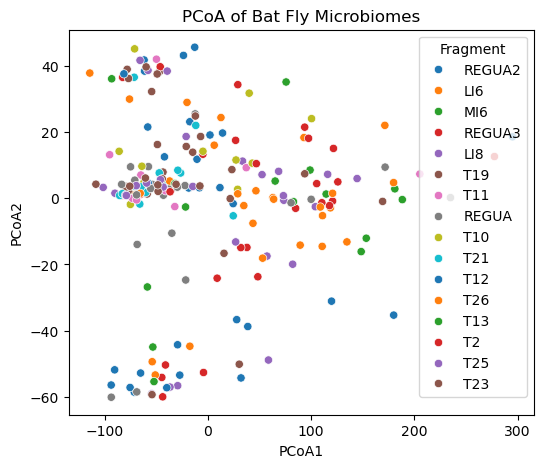

In [19]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pcoa_df,
    x="PCoA1",
    y="PCoA2",
    hue="Fragment",
    palette="tab10"
)
plt.title("PCoA of Bat Fly Microbiomes")
plt.show()

In [20]:
dispersion = []

for fragment, group in metadata.groupby("Fragment"):
    samples = group.index
    sub_dist = dist_df.loc[samples, samples]

    dispersion.append({
        "Fragment": fragment,
        "Dispersion": sub_dist.mean(axis=1).mean(),
        "n_samples": len(samples)
    })

dispersion_df = pd.DataFrame(dispersion)
dispersion_df

,Fragment,Dispersion,n_samples
0,LI6,37.166671,18
1,LI8,33.945065,12
2,MI6,34.950726,4
3,REGUA,32.849260,22
4,REGUA2,35.120472,16
5,REGUA3,38.559639,21
6,T10,32.127024,11
7,T11,30.123289,9
8,T12,30.533621,14
9,T13,34.474844,11


In [21]:
dispersion_df["Fragmentation"] = np.where(
    dispersion_df["Fragment"].str.upper().str.contains("REGUA"),
    "Continuous",
    "Fragmented"
)

dispersion_df[["Fragment", "Fragmentation"]]

,Fragment,Fragmentation
0,LI6,Fragmented
1,LI8,Fragmented
2,MI6,Fragmented
3,REGUA,Continuous
4,REGUA2,Continuous
5,REGUA3,Continuous
6,T10,Fragmented
7,T11,Fragmented
8,T12,Fragmented
9,T13,Fragmented


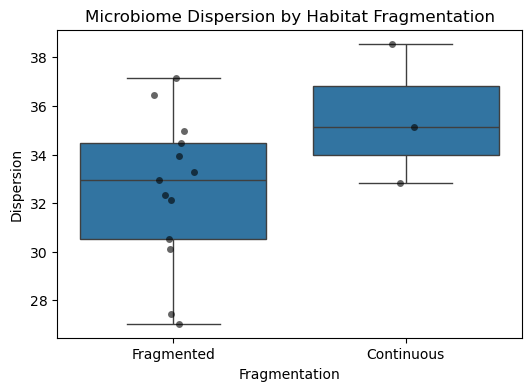

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=dispersion_df,
    x="Fragmentation",
    y="Dispersion"
)
sns.stripplot(
    data=dispersion_df,
    x="Fragmentation",
    y="Dispersion",
    color="black",
    alpha=0.6
)
plt.title("Microbiome Dispersion by Habitat Fragmentation")
plt.show()

In [29]:
from numpy.random import permutation

cont = dispersion_df.query("Fragmentation == 'Continuous'")["Dispersion"].values
frag = dispersion_df.query("Fragmentation == 'Fragmented'")["Dispersion"].values

obs_diff = abs(cont.mean() - frag.mean())

n_perm = 10000
count = 0
combined = np.concatenate([cont, frag])

for _ in range(n_perm):
    perm = permutation(combined)
    if abs(perm[:len(cont)].mean() - perm[len(cont):].mean()) >= obs_diff:
        count += 1

p_value = count / n_perm
obs_diff, p_value

(2.9880260384035964, 0.1411)

In [30]:
landscape = pd.read_csv("LandscapeVariables.csv")
dispersion_df = dispersion_df.merge(landscape, on="Fragment", how="left")

frag_only = dispersion_df.query("Fragmentation == 'Fragmented'").dropna(subset=["Area"])
frag_only["logArea"] = np.log10(frag_only["Area"])

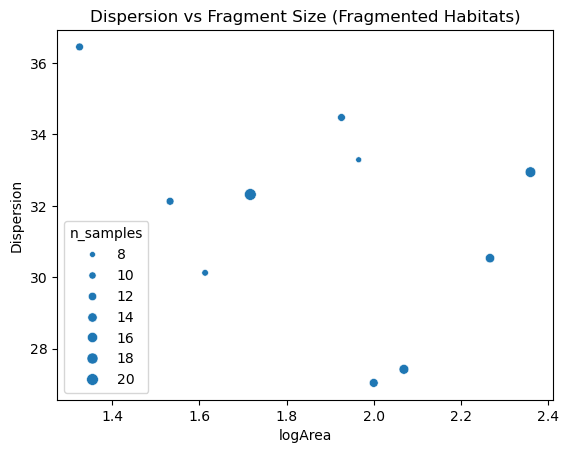

In [31]:
sns.scatterplot(
    data=frag_only,
    x="logArea",
    y="Dispersion",
    size="n_samples"
)
plt.title("Dispersion vs Fragment Size (Fragmented Habitats)")
plt.show()

In [32]:
from scipy.stats import spearmanr
rho, p = spearmanr(frag_only["logArea"], frag_only["Dispersion"])
rho, p

(-0.33333333333333326, 0.34659350708733405)